In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

data = fetch_openml(name='wine-quality-red', as_frame=True)

df = pd.concat([data.data, data.target.rename('quality')], axis=1)

df.to_csv("wine_quality.csv", index=False)


In [2]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine_quality.csv")

X = df.drop(columns='quality')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_scaled)

df['cluster'] = kmeans.labels_


In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


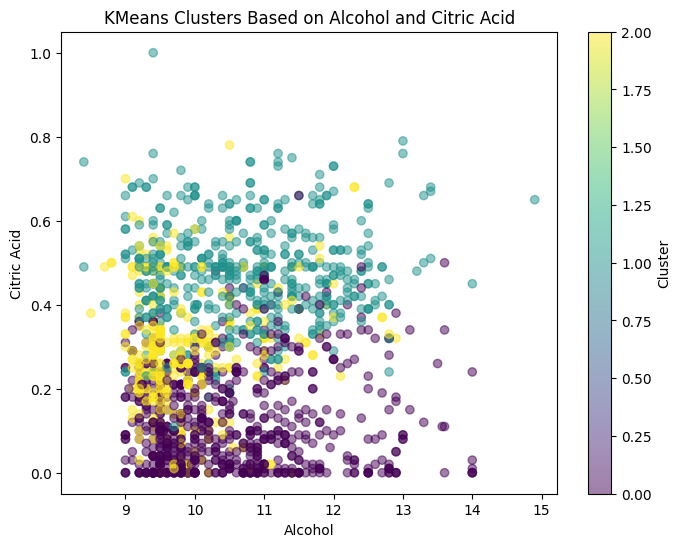

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['citric_acid'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Alcohol')
plt.ylabel('Citric Acid')
plt.title('KMeans Clusters Based on Alcohol and Citric Acid')
plt.colorbar(label='Cluster')
plt.show()
